In [12]:
!pip install pandas


In [29]:

import pandas as pd
import matplotlib.pyplot as plt



In [3]:
data_frame = pd.read_csv("E:\SKILLENABLE\INTERVIEW PREP\World Bank Indicators.csv")
                         
data_frame

,Country Name,Date,"Transit: Railways, (million passenger-km)","Transit: Passenger cars (per 1,000 people)",Business: Mobile phone subscribers,Business: Internet users (per 100 people),"Health: Mortality, under-5 (per 1,000 live births)",Health: Health expenditure per capita (current US$),"Health: Health expenditure, total (% GDP)",Population: Total (count),Population: Urban (count),"Population:: Birth rate, crude (per 1,000)","Health: Life expectancy at birth, female (years)","Health: Life expectancy at birth, male (years)","Health: Life expectancy at birth, total (years)",Population: Ages 0-14 (% of total),Population: Ages 15-64 (% of total),Population: Ages 65+ (% of total),Finance: GDP (current US$),Finance: GDP per capita (current US$)
0,Afghanistan,7/1/2000,0,NaN,0,NaN,151.0,11,8.0,"25,950,816","5,527,524",51.0,45.0,45.0,45.0,48.0,50.0,2.0,NaN,NaN
1,Afghanistan,7/1/2001,0,NaN,0,0.0,150.0,11,9.0,"26,697,430","5,771,984",50.0,46.0,45.0,46.0,48.0,50.0,2.0,"2,461,666,315",92
2,Afghanistan,7/1/2002,0,NaN,"25,000",0.0,150.0,22,7.0,"27,465,525","6,025,936",49.0,46.0,46.0,46.0,48.0,50.0,2.0,"4,338,907,579",158
3,Afghanistan,7/1/2003,0,NaN,"200,000",0.0,151.0,25,8.0,"28,255,719","6,289,723",48.0,46.0,46.0,46.0,48.0,50.0,2.0,"4,766,127,272",169
4,Afghanistan,7/1/2004,0,NaN,"600,000",0.0,150.0,30,9.0,"29,068,646","6,563,700",47.0,46.0,46.0,46.0,48.0,50.0,2.0,"5,704,202,651",196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Zimbabwe,7/1/2006,NaN,NaN,"849,146",10.0,97.0,NaN,NaN,"12,529,655","4,558,288",29.0,44.0,46.0,45.0,40.0,56.0,4.0,"5,443,896,500",434
2350,Zimbabwe,7/1/2007,NaN,98.0,"1,225,654",11.0,92.0,NaN,NaN,"12,481,245","4,600,587",29.0,45.0,47.0,46.0,40.0,56.0,4.0,"5,291,950,101",424
2351,Zimbabwe,7/1/2008,NaN,NaN,"1,654,721",11.0,88.0,NaN,NaN,"12,451,543","4,649,406",29.0,46.0,48.0,47.0,40.0,56.0,4.0,"4,415,702,801",355
2352,Zimbabwe,7/1/2009,NaN,NaN,"3,991,000",11.0,83.0,NaN,NaN,"12,473,992","4,717,664",29.0,47.0,49.0,48.0,39.0,57.0,4.0,"5,836,213,746",468


In [4]:
data_frame.columns

Index(['Country Name', 'Date', 'Transit: Railways, (million passenger-km)',
       'Transit: Passenger cars (per 1,000 people)',
       'Business: Mobile phone subscribers',
       'Business: Internet users (per 100 people)',
       'Health: Mortality, under-5 (per 1,000 live births)',
       'Health: Health expenditure per capita (current US$)',
       'Health: Health expenditure, total (% GDP)',
       'Population: Total (count)', 'Population: Urban (count)',
       'Population:: Birth rate, crude (per 1,000)',
       'Health: Life expectancy at birth, female (years)',
       'Health: Life expectancy at birth, male (years)',
       'Health: Life expectancy at birth, total (years)',
       'Population: Ages 0-14 (% of total)',
       'Population: Ages 15-64 (% of total)',
       'Population: Ages 65+ (% of total)', 'Finance: GDP (current US$)',
       'Finance: GDP per capita (current US$)'],
      dtype='object')

## What is the average life expectancy at birth for women of different countries?


In [8]:
average_life_expectancies = data_frame.groupby('Country Name')['Health: Life expectancy at birth, female (years)'].mean()
average_life_expectancies


Country Name
Afghanistan              46.727273
Albania                  79.090909
Algeria                  72.909091
American Samoa                 NaN
Andorra                        NaN
                           ...    
Virgin Islands (U.S.)    81.181818
West Bank and Gaza       73.363636
Yemen, Rep.              64.000000
Zambia                   45.000000
Zimbabwe                 44.363636
Name: Health: Life expectancy at birth, female (years), Length: 214, dtype: float64

## What is the correlation between the number of mobile phone subscribers and the number of internet users?


In [19]:
correlation = data_frame['Business: Mobile phone subscribers	'].corr(data_frame['Business: Internet users (per 100 people)	'])
correlation

KeyError: 'Business: Mobile phone subscribers\t'

## What is the difference in the average GDP per capita between urban and rural areas?


In [22]:
average_gdp_urban = data_frame.loc[data_frame['Country Name'] == 'Population: Total (count)', 'Finance: GDP per capita (current US$)'].mean()
average_gdp_rural = data_frame.loc[data_frame['Country Name'] == 'Population: Urban (count)', 'Finance: GDP per capita (current US$)'].mean()
difference = average_gdp_urban - average_gdp_rural
difference



nan

## Find top five countries with the highest number of passenger cars per 1,000 people?


In [24]:
data['Transit: Passenger cars (per 1,000 people)'] = (data_frame['Transit: Passenger cars (per 1,000 people)'] / data_frame['Population: Total (count)']) * 1000
data

TypeError: unsupported operand type(s) for /: 'float' and 'str'

In [28]:
sorted_data = data_frame.sort_values('Cars_per_1000', ascending=False)
sorted_data

KeyError: 'Cars_per_1000'

In [27]:
top_five_countries = sorted_data.head(5)
top_five_countries

NameError: name 'sorted_data' is not defined

## What is the relationship between the population's age distribution and the country's GDP per capita?


ValueError: could not convert string to float: '1,200'

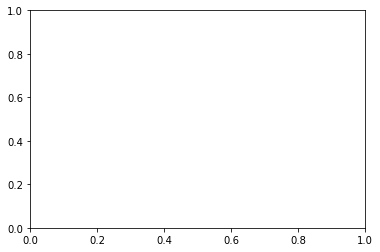

In [31]:
# Create a scatter plot to visualize the relationship between age distribution and GDP per capita
plt.scatter(data_frame['Population: Ages 0-14 (% of total)'], data_frame['Finance: GDP per capita (current US$)'])
plt.xlabel('Age Distribution')
plt.ylabel('GDP per capita')
plt.title('Relationship between Age Distribution and GDP per capita')

# Add trendline if desired
z = np.polyfit(data_frame['Population: Ages 0-14 (% of total)'], data_frame['Finance: GDP per capita (current US$)'], 1)
p = np.poly1d(z)
plt.plot(data_frame['Population: Ages 0-14 (% of total)'], p(data_frame['Finance: GDP per capita (current US$)']), 'r--')

# Display the plot
plt.show()


## What are the top 5 countries with the highest life expectancy at birth?


In [42]:
sorted_data = data_frame.sort_values('Health: Life expectancy at birth, total (years)', ascending=False)
top_five_countries = sorted_data.head(5)
top_five_countries

,Country Name,Date,"Transit: Railways, (million passenger-km)","Transit: Passenger cars (per 1,000 people)",Business: Mobile phone subscribers,Business: Internet users (per 100 people),"Health: Mortality, under-5 (per 1,000 live births)",Health: Health expenditure per capita (current US$),"Health: Health expenditure, total (% GDP)",Population: Total (count),Population: Urban (count),"Population:: Birth rate, crude (per 1,000)","Health: Life expectancy at birth, female (years)","Health: Life expectancy at birth, male (years)","Health: Life expectancy at birth, total (years)",Population: Ages 0-14 (% of total),Population: Ages 15-64 (% of total),Population: Ages 65+ (% of total),Finance: GDP (current US$),Finance: GDP per capita (current US$)
922,"Hong Kong SAR, China",7/1/2009,NaN,56.0,"12,597,171",69.0,NaN,NaN,NaN,"7,003,700","7,003,700",12.0,86.0,80.0,83.0,12.0,76.0,13.0,"209,283,263,242","29,882"
1767,San Marino,7/1/2007,NaN,NaN,"17,500",50.0,3.0,"3,869",7.0,"31,007","29,202",9.0,85.0,80.0,83.0,NaN,NaN,NaN,"1,687,653,983","54,428"
1768,San Marino,7/1/2008,NaN,NaN,"24,000",55.0,2.0,"4,222",7.0,"31,198","29,395",11.0,86.0,80.0,83.0,NaN,NaN,NaN,"1,899,809,580","60,895"
1769,San Marino,7/1/2009,NaN,NaN,"24,000",54.0,2.0,"3,864",7.0,"31,359","29,559",11.0,86.0,80.0,83.0,NaN,NaN,NaN,NaN,NaN
1770,San Marino,7/1/2010,NaN,NaN,"24,000",NaN,2.0,"3,655",7.0,"31,534","29,737",11.0,86.0,80.0,83.0,NaN,NaN,NaN,NaN,NaN


## Name the countries with the highest and lowest GDP per capita?


In [43]:
highest_country = data_frame.sort_values('Finance: GDP per capita (current US$)', ascending=False).iloc[0]
print("Country with the highest GDP per capita:")
print(highest_country[['Country Name', 'Finance: GDP per capita (current US$)']])


lowest_country = data_frame.sort_values('Finance: GDP per capita (current US$)').iloc[0]
print("Country with the lowest GDP per capita:")
print(lowest_country[['Country Name', 'Finance: GDP per capita (current US$)']])



Country with the highest GDP per capita:
Country Name                             Mongolia
Finance: GDP per capita (current US$)         991
Name: 1424, dtype: object
Country with the lowest GDP per capita:
Country Name                             Cameroon
Finance: GDP per capita (current US$)       1,000
Name: 358, dtype: object


## How does the GDP vary among different countries?


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U11'), dtype('<U11')) -> dtype('<U11')

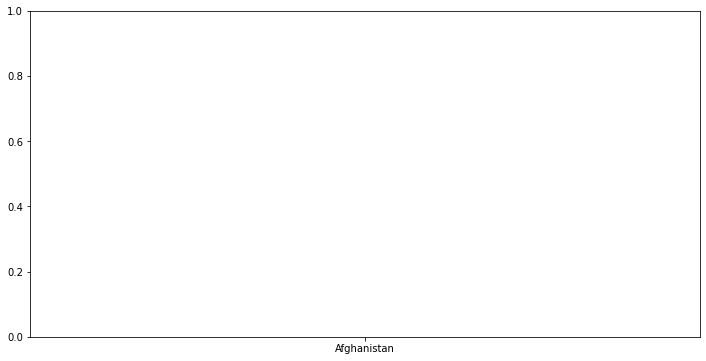

In [47]:
plt.figure(figsize=(12, 6))
plt.bar(data_frame['Country Name'], data_frame['Finance: GDP per capita (current US$)'])
plt.xticks(rotation=90)
plt.xlabel('Country Name')
plt.ylabel('Finance: GDP per capita (current US$)')
plt.title('GDP Comparison among Different Countries')
plt.tight_layout()
plt.show()
